<h1>Cours 4 : CAH et K-Means (TP 7-8)<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Première-Partie-:-CAH" data-toc-modified-id="Première-Partie-:-CAH-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Première Partie : CAH</a></span><ul class="toc-item"><li><span><a href="#Cours" data-toc-modified-id="Cours-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cours</a></span></li><li><span><a href="#Exercice" data-toc-modified-id="Exercice-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exercice</a></span></li></ul></li><li><span><a href="#Deuxième-Partie-:-K-Means-(Noté-!)" data-toc-modified-id="Deuxième-Partie-:-K-Means-(Noté-!)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deuxième Partie : K-Means (Noté !)</a></span><ul class="toc-item"><li><span><a href="#Cours" data-toc-modified-id="Cours-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cours</a></span></li><li><span><a href="#Exercice" data-toc-modified-id="Exercice-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exercice</a></span></li></ul></li></ul></div>

Nous étudierons deux méthodes de Clustering (algorithmes non supervisés) dans ce cours. Dans la première partie, nous présenterons la Classification Ascendante Hierarchique (CAH), puis dans la deuxième, le K-Means. <br>
Les exercices vérifient que nos implémentations concordent avec celles du package scikit-learn.


# Première Partie : CAH

## Cours

La classification ascendante hierarchique est une méthode de clustering (apprentissage non supervisée) pour rapprocher des individus qui ont des points de similitudes. <br>
Elle est composée de 2 étapes. <br>
La construction du Dendogramme :

1) Initialisation : On range les individus dans des clusters différents (K = n).<br>
2) Fusion : Les 2 clusters les plus proches sont fusionnés. <br>
3) On boucle sur 2) jusqu'à ce que K = 1 <br>
4) On construit le dendogramme qui représente les fusions successives des clusters et les distances entre ces fusions.

A partir du dendogramme, on décide de couper l'arbre à l'horizontal pour pouvoir former le nombre de clusters souhaité. <br>
Pour obtenir le clustering, on répète l'étape initialisation et fusion jusqu'à notre K nombre de clusters. 

Quelle distance utilisée pour fusionner des clusters ? <br>

1) Distance du lien minimum : $d(c_1,c_2)=min \{d(a,b), a \in c_1, b \in c_2\}$<br>
construit des distances de proche en proche permettant de trouver des formes sinueuses de clusters.<br>

2) Distance du lien maximum : $d(c_1,c_2)=max \{d(a,b), a \in c_1, b \in c_2\}$<br>
permet de fabriquer des clusters de même diamètre, très sensible aux outliers. <br>

3) Distance moyenne : $d(c_1,c_2) = \frac{1}{n_1 n_2} \sum \limits_{a\in A} \sum \limits_{b\in B} d(a,b)$<br>
construit des clusters avec des variances proches. <br>


4) Distance de Ward : $d(c_1,c_2) = \frac{d(\hat{c_1},\hat{c_2})}{\frac{1}{n_1}+\frac{1}{n_2}}$ où $\hat{c_1},\hat{c_2}$ sont les barycentres,<br>
fabrique des clusters sphériques. 


## Exercice

On va utiliser la Classification Hierarchique Ascendante pour segmenter des consommateurs.

1) Charger le dataset "shopping_data.csv" <br>
2) Description statistique du dataset. <br>
3) Construire le dendogramme avec la fonction hierarchy de scipy.cluster, sur les variables Annual Income et Spending Score. (Distance de votre choix) <br>
4) Choisissez un bon nombre de clusters. <br>
5) Utiliser la fonction AgglomerativeClustering (sklearn.cluster) avec la distance de votre choix et votre nombre de clusters. <br>
7) Avec un scatter plot, observez sur les axes Annual Income et Spending Score la répartition des clusters. <br> 
8) Faites une description statistique des clients présents dans chaque cluster. <br>
9) Répéter les étapes 3 à 8 avec une autre distance. Observez-vous des différences ?

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("../data/shopping_data.csv")

In [23]:
df["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [29]:
!pip install pandas-profiling

In [24]:
from pandas_profiling import ProfileReport

In [31]:
ProfileReport(df.drop("CustomerID",axis=1))

Number of variables,4
Number of observations,200
Total Missing (%),0.0%
Total size in memory,6.3 KiB
Average record size in memory,32.4 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [44]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

In [45]:
customer_data = pd.read_csv('../data/shopping_data.csv')  
data=customer_data.iloc[:, 3:5]

In [55]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [57]:
data.iloc[48:50,]

,Annual Income (k$),Spending Score (1-100)
48,40,42
49,40,42


In [49]:
data.shape

(200, 2)

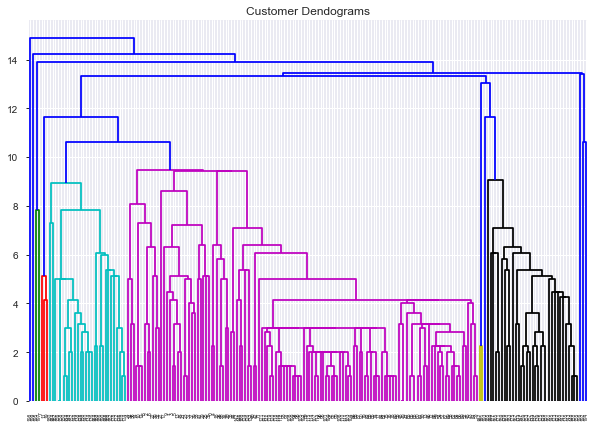

In [59]:
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='single'))  

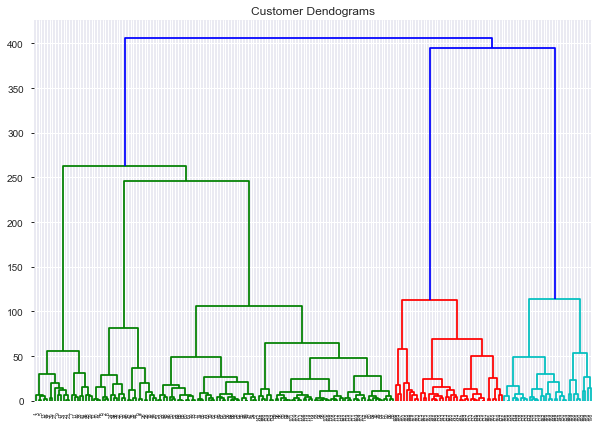

In [58]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
ac=AgglomerativeClustering(n_clusters=3,linkage="ward")

In [63]:
y_pred=ac.fit_predict(data)

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [133]:
import sklearn

In [138]:
sklearn.__version__

'0.19.1'

In [137]:
!pip install sklearn --upgrade

Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x10d2755f8>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',)': /simple/sklearn/
Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x10d2754e0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',)': /simple/sklearn/
Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x10d2751d0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',)': /simple/sklearn/
Retrying (Retry(total=1, connect=N

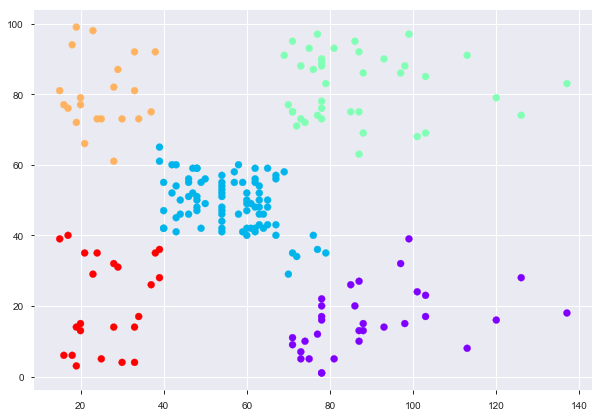

In [139]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 
plt.figure(figsize=(10, 7))  
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster.labels_, cmap='rainbow') 

In [140]:
customer_data[customer_data["Cluster"]==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,129.000000,129.000000,129.000000,129.000000,129.0
mean,65.596899,40.178295,45.550388,49.131783,0.0
std,38.549384,15.976765,16.909669,19.499351,0.0
min,1.000000,18.000000,15.000000,3.000000,0.0
25%,33.000000,25.000000,33.000000,41.000000,0.0
50%,65.000000,38.000000,48.000000,49.000000,0.0
75%,97.000000,51.000000,60.000000,58.000000,0.0
max,161.000000,70.000000,79.000000,99.000000,0.0


In [80]:
customer_data[customer_data["Cluster"]==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,32.000000,32.000000,32.000000,32.000000,32.0
mean,166.250000,41.000000,89.406250,15.593750,1.0
std,21.005376,11.036596,16.612975,8.936548,0.0
min,129.000000,19.000000,71.000000,1.000000,1.0
25%,150.500000,34.000000,78.000000,9.750000,1.0
50%,168.000000,41.500000,86.500000,15.000000,1.0
75%,183.500000,47.000000,98.250000,20.500000,1.0
max,199.000000,59.000000,137.000000,39.000000,1.0


In [81]:
customer_data[customer_data["Cluster"]==2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,2.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,2.0
25%,143.000000,30.000000,75.500000,74.500000,2.0
50%,162.000000,32.000000,79.000000,83.000000,2.0
75%,181.000000,35.500000,95.000000,90.000000,2.0
max,200.000000,40.000000,137.000000,97.000000,2.0


# Deuxième Partie : K-Means (Noté !)

## Cours

Le K-Means est l'algorithme le plus courant dans l'apprentissage supervisée. Le concept du K-Means est basé sur une assignation des observations dans K clusters. <br>
On distingue 3 étapes : <br> 

- Initialisation : initialiser aléatoirement les K centroïdes en choississant K observations. <br>
- Clustering : Assigner les observations au centroïde le plus proche en minimisant une distance type L1 ou L2. <br>
$\forall i \in \{1,..,n\}:$
\begin{equation*}
c^{(i)} = Arg min_j ||x^{(i)} - \mu_j||^2
\end{equation*}<br>
j est l'indice du cluster auquel on affecte l'observation i.

- Centroïdes : Recalculer les centroïdes. <br>
$\forall j \in \{1,..,K\} :$
\begin{equation*}
\mu_j = \frac{\sum_i^{n} x^{(i)}\mathbb{1}_{c^{(i)}=j} }{\sum_i^{n} \mathbb{1}_{c^{(i)}=j}}
\end{equation*}
<br>
Répéter Clustering et Centroïdes jusqu'à ce que les observations ne changent plus de cluster. 

## Exercice

1) Créer une fonction K-Means étape par étape. (Une fonction Initialisation, une fonction Clustering, une fonction Centroides).<br>
2) Chercher un dataset de votre choix pour appliquer le K-Means.<br>
3) Utiliser la fonction KMeans de sklearn.cluster <br>


In [341]:
df=customer_data[["Annual Income (k$)","Spending Score (1-100)"]]

In [342]:
def Initialisation(X,K=4,seed=26):
    centroids=np.zeros((K,X.shape[1]))
    np.random.seed(seed)
    for k in range(K):
        idx=np.random.randint(0,X.shape[0])
        centroids[k]=X.iloc[idx,:]
    return centroids

In [343]:
def L1_dist(X,y):
    return np.sum(np.abs(X-y),axis=1)

In [344]:
def L2_dist(X,y):
    return np.sqrt(np.sum(np.square(X-y),axis=1))

In [470]:
def Clustering(X,centroids,dist="L1"):
    dists=np.zeros(shape=(X.shape[0],centroids.shape[0]))
    clusters=np.zeros(shape=(X.shape[0],1))
    for k in range(centroids.shape[0]):
        if dist=="L1":
            dists[:,k]=L1_dist(X,centroids[k])
        if dist=="L2":
            dists[:,k]=L2_dist(X,centroids[k])
    
    clusters=pd.DataFrame(dists).apply(lambda x : np.argmin(x),axis=1)
    distorsion=0
    for i in range(dists.shape[0]):
        distorsion+=np.square(dists[i,clusters[i]])
    return clusters,distorsion

In [480]:
def Centroids(X,clusters,K):
    centroids=np.zeros((K,X.shape[1]))
    for k in range(K):
        if np.sum(clusters==k)>0:
            centroids[k]=np.sum(X[clusters==k])/np.sum(clusters==k)
        if np.sum(clusters==k)==0:
            centroids[k]=np.array([0,0])
    return centroids

In [481]:
def Kmeans(X,K,dist="L2",nb_iter=20,seed=2):
    centroids=Initialisation(X,K=K,seed=seed) # ETAPE INIT
    for i in range(nb_iter):
        clusters,distorsion=Clustering(X,centroids=centroids,dist=dist)#ETAPE CLUSTERING
        centroids=Centroids(X,clusters,K) #ETAPE CENTROIDES
    return clusters,distorsion

In [485]:
distorsions=np.zeros((19,1))
for k in range(1,20):
    distorsions[k-1]=Kmeans(df,K=k,dist="L2",nb_iter=10,seed=2)[1]

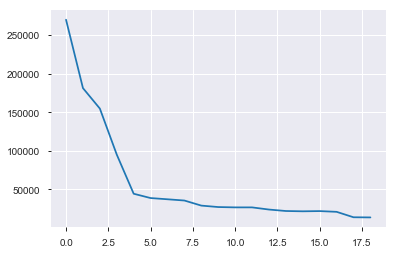

In [487]:
plt.plot(distorsions)

In [500]:
df["Classif_KMeans"],_=Kmeans(df,K=5,dist="L2",nb_iter=10,seed=2)

/Users/LF/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


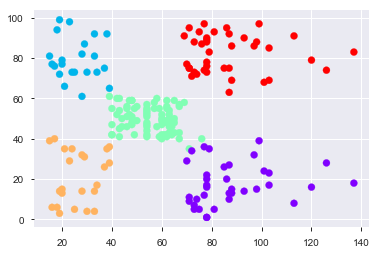

In [501]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df.iloc[:,2],cmap="rainbow")

In [502]:
from sklearn.cluster import KMeans

In [509]:
km=KMeans(n_clusters=5)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [511]:
km.inertia_

44452.406065217656

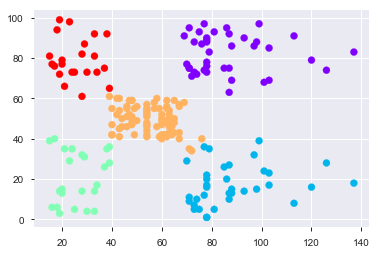

In [508]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=km.fit_predict(df),cmap="rainbow")